# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(15000, 15)

In [ ]:
df = df.dropna()

df.shape

(12427, 15)

In [ ]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


<ipython-input-8-275d99bbbd4a>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)


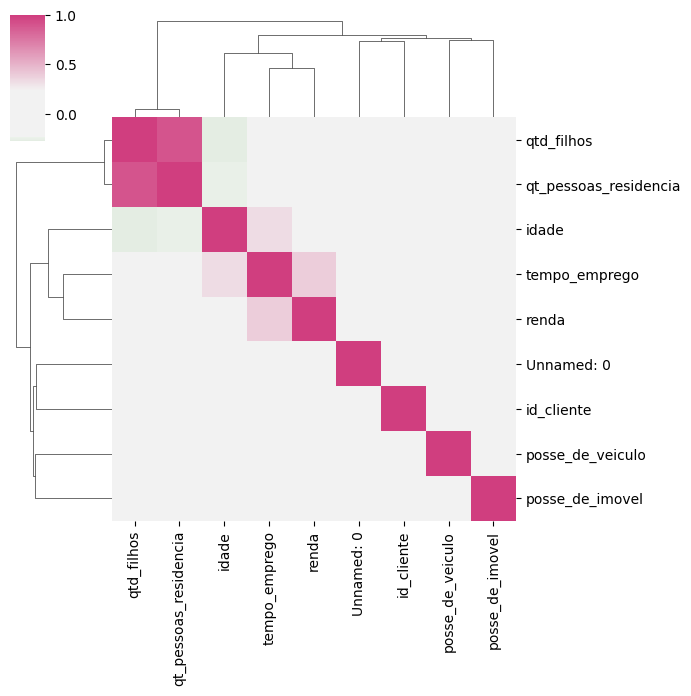

In [ ]:
# Criando uma matriz de correlação que me auxilia a saber quais são
# as variáveis que apresentam relação com a renda:


cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True,
                             sep=60, center="light")

sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)

In [ ]:
# Para a criação do modelo, irei utilizar as variáveis que sejam pertinentes com
# base na matriz de correlação. As únicas variáveis que não se baseiam nela, porém,
# são sexo e educação.

df = df[["renda", "sexo", "qtd_filhos", "educacao", "idade",
         "tempo_emprego", "qt_pessoas_residencia"]]

df.head()

,renda,sexo,qtd_filhos,educacao,idade,tempo_emprego,qt_pessoas_residencia
0,8060.34,F,0,Secundário,26,6.602740,1.0
1,1852.15,M,0,Superior completo,28,7.183562,2.0
2,2253.89,F,0,Superior completo,35,0.838356,2.0
3,6600.77,F,1,Superior completo,30,4.846575,3.0
4,6475.97,M,0,Secundário,33,4.293151,1.0


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [ ]:
y, x = patsy.dmatrices('renda ~ sexo + qtd_filhos + educacao + idade + tempo_emprego + qt_pessoas_residencia', data = df)

# Executando o modelo de regressão com o método dos mínimos quadrados:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     469.1
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:10:34   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12417   BIC:                         2.577e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -3658.2095    876.516     -4.174      0.000   -5376.317   -1940.102
sexo[T.M]                        6033.8419    146.568     41.168      0.000    5746.547    6321.137
educacao[T.Pós graduação]        1485.3515   1687.322      0.880      0.379   -1822.062    4792.765
educacao[T.Secundário]            676.3612    763.215      0.886      0.376    -819.659    2172.382
educacao[T.Superior completo]    1356.9000    765.784      1.772      0.076    -144.156    2857.956
educacao[T.Superior incompleto]   303.0249    824.668      0.367      0.713   -1313.453    1919.503
qtd_filhos                       -147.2630    205.081     -0.718      0.473    -549.253     254.727
idade                              45.3194      8.232      5.506      0.000      29.184      61.455
tempo_emprego                     548.7087     10.904     50.322      0.000     527.335     570.082
qt_pessoas_residencia             286.1694    171.209      1.671      0.095     -49.426     621.765
==============================================================================
Omnibus:                    17530.368   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9754717.189
Skew:                           8.093   Prob(JB):                         0.00
Kurtosis:                     139.298   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **dúvida:**

Como eu faço para excluir todas as partes da coluna educacao, mantendo apenas educacao[T.Superior completo]? Porque analisando a tabela, copreende-se que pelo valor-p, o ensino superior completo interfere com relevência estatística na renda.


In [ ]:
# Selecionando apenas as variáveis pertinentes:

y, x = patsy.dmatrices('renda ~ sexo + idade + tempo_emprego', data=df)

# Executando o modelo de regressão com o método dos mínimos quadrados:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1393.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:10:34   Log-Likelihood:            -1.2883e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12423   BIC:                         2.577e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1933.8383    321.845     -6.009      0.000   -2564.704   -1302.973
sexo[T.M]      6034.0492    145.563     41.453      0.000    5748.723    6319.376
idade            39.5183      7.807      5.062      0.000      24.216      54.821
tempo_emprego   549.7277     10.903     50.421      0.000     528.357     571.099
==============================================================================
Omnibus:                    17492.642   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9613786.850
Skew:                           8.063   Prob(JB):                         0.00
Kurtosis:                     138.303   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Verificando qual é a variável mais frequente, para defini-la como
# castela de referência:

df.stack().value_counts()

F             7901
0             7887
2.0           7827
Secundário    7045
1.0           4948
              ... 
4311.97          1
12791.46         1
3484.7           1
4395.67          1
1160.99          1
Length: 10778, dtype: int64

In [ ]:
df.head()

,renda,sexo,qtd_filhos,educacao,idade,tempo_emprego,qt_pessoas_residencia
0,8060.34,F,0,Secundário,26,6.602740,1.0
1,1852.15,M,0,Superior completo,28,7.183562,2.0
2,2253.89,F,0,Superior completo,35,0.838356,2.0
3,6600.77,F,1,Superior completo,30,4.846575,3.0
4,6475.97,M,0,Secundário,33,4.293151,1.0


In [ ]:
# Como aparentemente o dado mais frequente no dataframe é o "F",
# que simboliza as mulheres, irei defini-la como a variável
# castela de referência ao modelo.

y, x = patsy.dmatrices('np.log(renda) ~ C(sexo, Treatment(0)) + idade + tempo_emprego', data=df)

# Executando o modelo de regressão com o método dos mínimos quadrados:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:10:35   Log-Likelihood:                -13706.
No. Observations:               12427   AIC:                         2.742e+04
Df Residuals:                   12423   BIC:                         2.745e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.3217      0.031    239.950      0.000       7.262       7.382
C(sexo, Treatment(0))[T.M]     0.7868      0.014     57.013      0.000       0.760       0.814
idade                          0.0046      0.001      6.253      0.000       0.003       0.006
tempo_emprego                  0.0609      0.001     58.869      0.000       0.059       0.063
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.826
Skew:                           0.019   Prob(JB):                        0.662
Kurtosis:                       3.009   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avaliando a tabela, ainda que o R² seja demasiadamente baixo, penso que o modelo faz sentido, tendo em vista que as variáveis explicativas que o compõe apresentam relevância estatística. Ainda, comparando com os demais modelos criados, concebe-se que esse, até o momento, é o melhor modelo.